In [1]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [2]:
%reset
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

#### Motor Setup


Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns

Plots


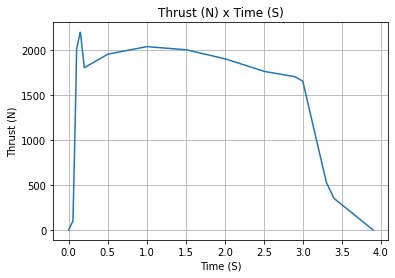

In [3]:

Pro75M1670 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

Pro75M1670.info()


#### Rocket Setup

In [4]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="data/proxima/proxima.csv",
    powerOnDrag="data/proxima/proxima.csv",
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

#### Flight Data

[0.0, 0.0, -0.024035656750753167, -1.0842021724855044e-19, -5.71527270932802e-20, 0.0]
[0.0, 0.0, -0.02599787080812175, -1.0842021724855044e-19, -7.066970989414604e-20, 0.0]
[0.0, 0.0, -0.026005713652825786, -1.0842021724855044e-19, -7.072373641412547e-20, 0.0]
[0.0, 0.0, -0.024886490853754276, -1.0842021724855044e-19, -6.301381543553735e-20, 0.0]
[0.0, 0.0, -0.02488796584581325, -1.0842021724855044e-19, -6.302397612224619e-20, 0.0]
[0.0, 0.0, -0.02575511407663646, -1.0842021724855044e-19, -6.899744658935581e-20, 0.0]
[0.0, 0.0, -0.025756614795138577, -1.0842021724855044e-19, -6.900778449622477e-20, 0.0]
[0.0, 0.0, -0.027541682954402572, -2.168404344971009e-19, -1.8972469053697683e-19, 0.0]
[0.0, 0.0, -0.02754168387560289, -2.168404344971009e-19, -1.8972469688279257e-19, 0.0]
[0.0, 0.0, -0.029392921107600348, -2.168404344971009e-19, -2.024772004800756e-19, 0.0]
[0.0, 0.0, -0.029392922743436252, -2.168404344971009e-19, -2.0247721174875737e-19, 0.0]
[0.0, 0.0, -0.031310941829100096, -2.1

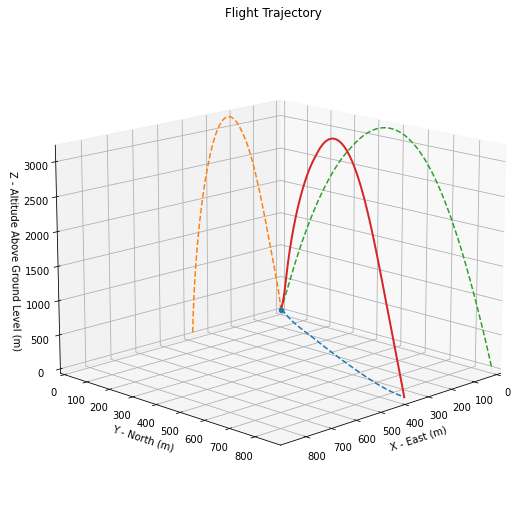



Fin Data



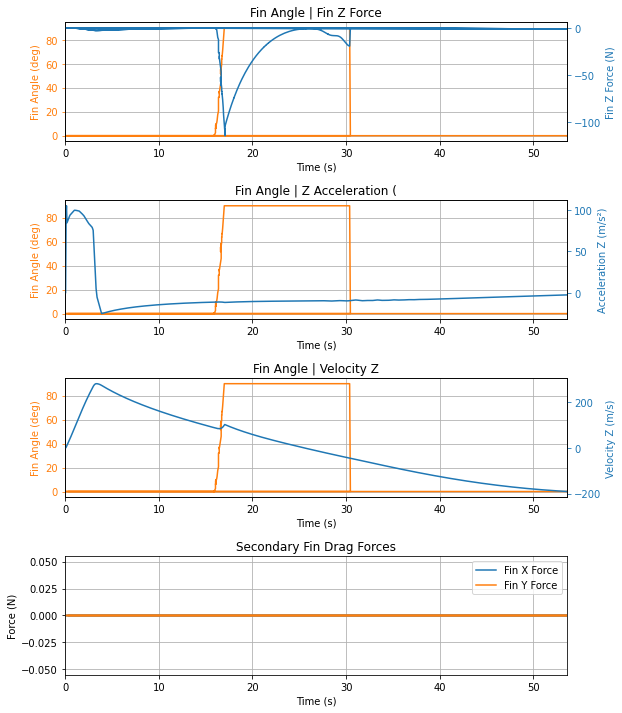



Trajectory Force Plots



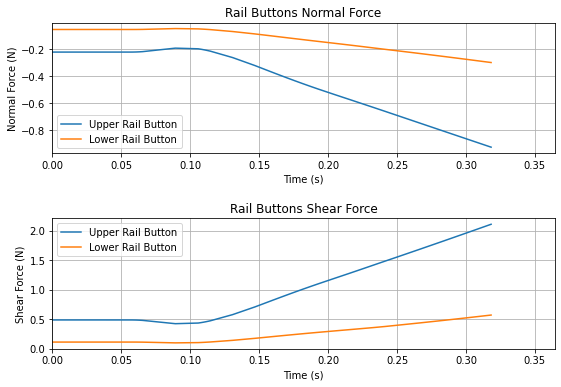

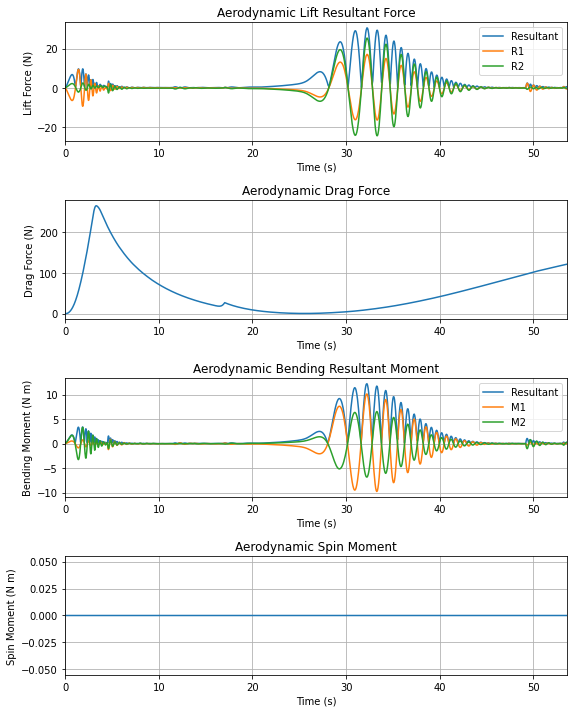



Trajectory Kinematic Plots



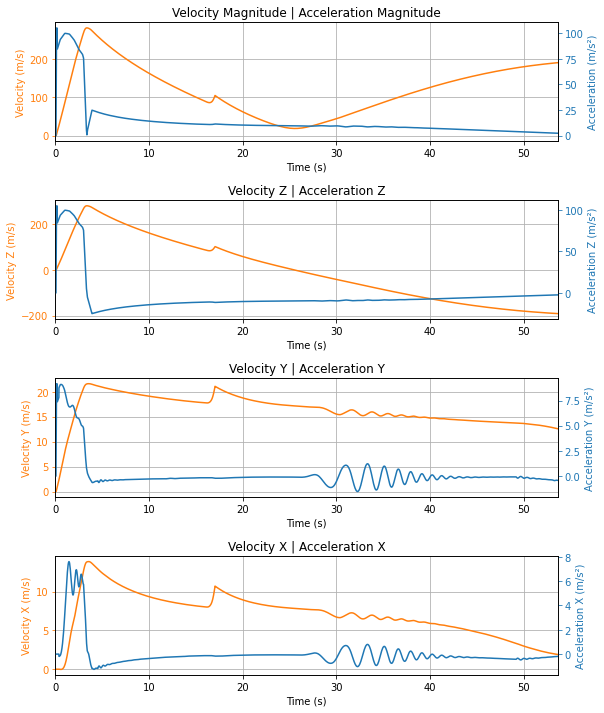



Angular Position Plots



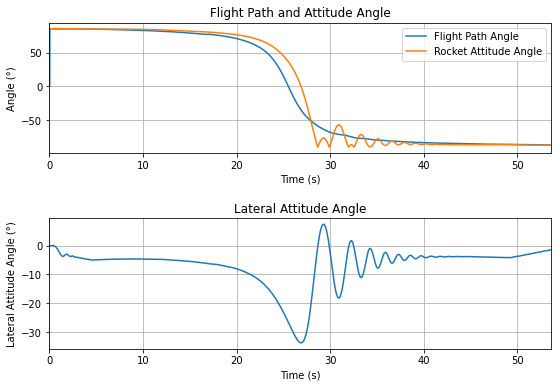



Path, Attitude and Lateral Attitude Angle plots



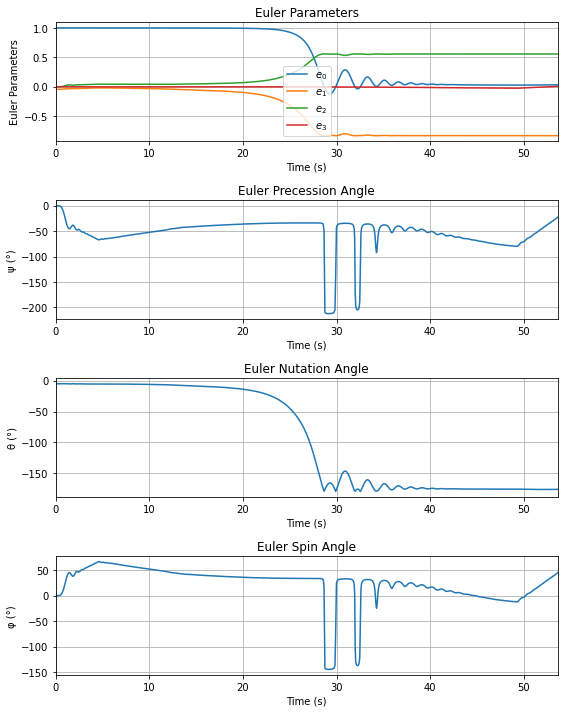



Trajectory Angular Velocity and Acceleration Plots



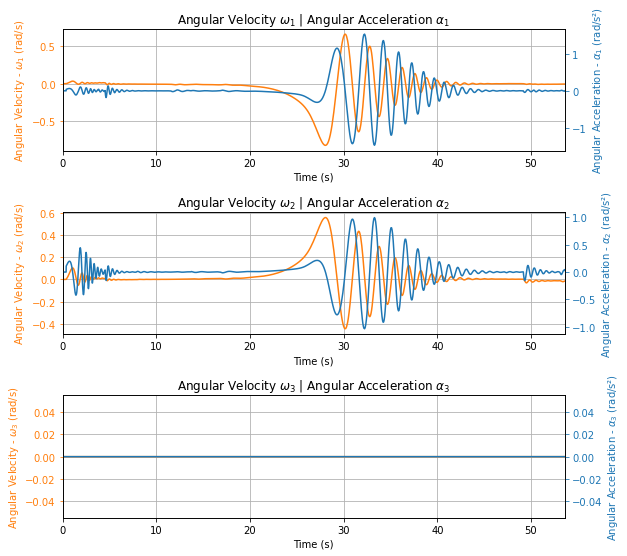



Trajectory Energy Plots



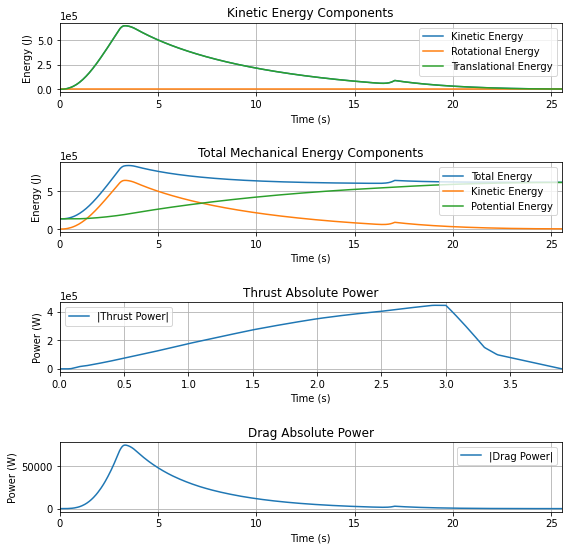



Trajectory Fluid Mechanics Plots



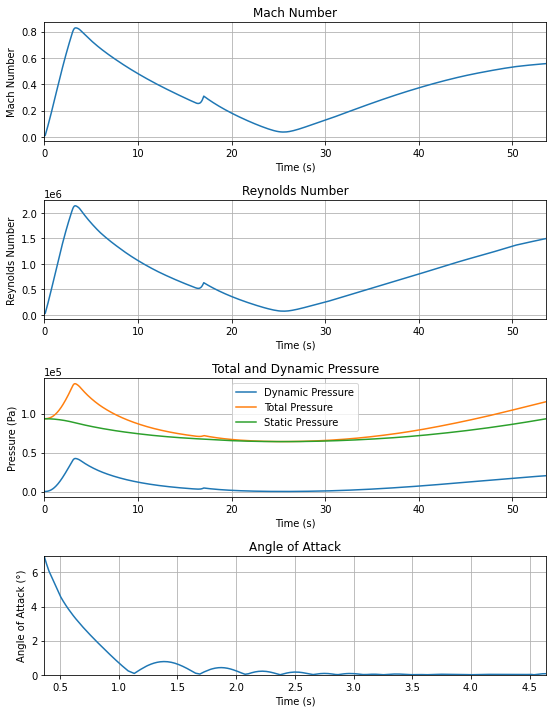



Trajectory Stability and Control Plots



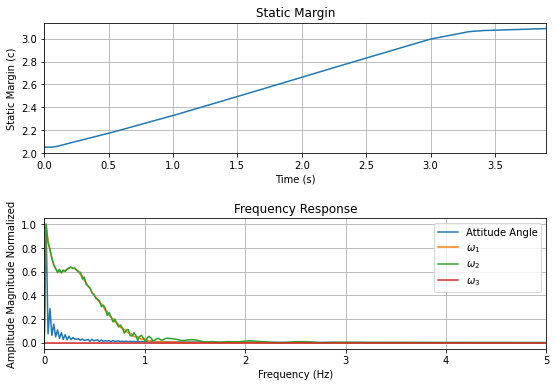

In [5]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()